# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.501  1  0.891 0.346 0.005   
                             age        0.022  1  0.040 0.843 0.000   
                             Kiel       1.876  1  3.337 0.069 0.017   
                             Magdeburg  5.226  1  9.300 0.003 0.046   
                             Sweden     9.044  1 16.093 0.000 0.078   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.016  1  1.061 0.304 0.006   
                             age        1.001  1  1.046 0.308 0.005   
                             Kiel       0.126  1  0.132 0.717 0.001   
                             Magdeburg  1.591  1  1.662 0.199 0.009   
                             Sweden    19.129  1 19.980 0.000 0.095   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.461  0.511    False  
                             age               0.074  0.906    False  
                             Kiel              1.159  0.157    False  
                             Magdeburg         2.582  0.011     True  
                             Sweden            4.063  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.517  0.468    False  
                             age               0.512  0.472    False  
                             Kiel              0.144  0.817    False  
                             Magdeburg         0.701  0.348    False  
                             Sweden            4.873  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.828  1  5.319 0.022 0.027   
                             age        0.011  1  0.068 0.794 0.000   
                             Kiel       0.404  1  2.596 0.109 0.013   
                             Magdeburg  0.844  1  5.426 0.021 0.028   
                             Sweden     2.227  1 14.314 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.993  1  1.136 0.288 0.006   
                             age        2.334  1  1.331 0.250 0.007   
                             Kiel       8.643  1  4.928 0.028 0.025   
                             Magdeburg 15.148  1  8.636 0.004 0.043   
                             Sweden     0.005  1  0.003 0.958 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.654  0.059    False  
                             age               0.100  0.867    False  
                             Kiel              0.963  0.209    False  
                             Magdeburg         1.680  0.056    False  
                             Sweden            3.684  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.541  0.435    False  
                             age               0.602  0.393    False  
                             Kiel              1.559  0.071    False  
                             Magdeburg         2.432  0.013     True  
                             Sweden            0.019  0.975    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.346         0.461  0.511    False   
                             Kiel      0.069         1.159  0.157    False   
                             Magdeburg 0.003         2.582  0.011     True   
                             Sweden    0.000         4.063  0.001     True   
                             age       0.843         0.074  0.906    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.304         0.517  0.468    False   
                             Kiel      0.717         0.144  0.817    False   
                             Magdeburg 0.199         0.701  0.348    False   
                             Sweden    0.000         4.873  0.000     True   
                             age       0.308         0.512  0.472    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.022         1.654  0.059    False  
                             Kiel      0.109         0.963  0.209    False  
                             Magdeburg 0.021         1.680  0.056    False  
                             Sweden    0.000         3.684  0.001     True  
                             age       0.794         0.100  0.867    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.288         0.541  0.435    False  
                             Kiel      0.028         1.559  0.071    False  
                             Magdeburg 0.004         2.432  0.013     True  
                             Sweden    0.958         0.019  0.975    False  
                             age       0.250         0.602  0.393    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.479     0.336     0.243         2.744     0.309
std       0.302         5.301     0.329     0.297         5.137     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.335     0.015     0.002         0.366     0.008
50%       0.121         0.916     0.243     0.089         1.050     0.178
75%       0.462         2.430     0.616     0.430         2.700     0.573
max       0.999       146.424     0.999     0.999        83.198     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49556/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.346         0.461   
A0A024R0T9;K7ER74;P02655                           AD     0.053         1.278   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.062         1.210   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.408         0.389   
A0A075B6H7                                         AD     0.177         0.752   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.064         1.194   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.264         0.578   
S4R3U6                                             AD     0.304         0.517   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.511    False   
A0A024R0T9;K7ER74;P02655                           AD      0.127    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.143    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.568    False   
A0A075B6H7                                         AD      0.320    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.148    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.425    False   
S4R3U6                                             AD      0.468    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.022         1.654   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.405   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.247         0.607   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.294         0.531   
A0A075B6H7                                         AD     0.201         0.697   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.050         1.303   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.544         0.265   
S4R3U6                                             AD     0.288         0.541   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.059    False  
A0A024R0T9;K7ER74;P02655                           AD      0.094    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.390    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.442    False  
A0A075B6H7                                         AD      0.335    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.399     0.334     0.245         1.502     0.316
std       0.288         1.595     0.314     0.288         1.791     0.314
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.013         0.362     0.040     0.009         0.365     0.029
50%       0.125         0.903     0.248     0.101         0.997     0.196
75%       0.435         1.901     0.593     0.431         2.030     0.574
max       0.999        19.462     0.999     0.999        26.996     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1032,988


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.346         0.461  0.511   
A0A024R0T9;K7ER74;P02655                           0.053         1.278  0.127   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.062         1.210  0.143   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.408         0.389  0.568   
A0A075B6H7                                         0.177         0.752  0.320   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.064         1.194  0.148   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.264         0.578  0.425   
S4R3U6                                             0.304         0.517  0.468   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.022   
A0A024R0T9;K7ER74;P02655                              False 0.039   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.247   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.294   
A0A075B6H7                                            False 0.201   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.050   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.544   
S4R3U6                                                False 0.288   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.654  0.059   
A0A024R0T9;K7ER74;P02655                                   1.405  0.094   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.607  0.390   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.531  0.442   
A0A075B6H7                                                 0.697  0.335   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.300   
Q9Y6X5                                                     1.303  0.113   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.265  0.672   
S4R3U6                                                     0.541  0.435   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    958
PI (yes) - QRILC (yes)   359
PI (no)  - QRILC (yes)    74
PI (yes) - QRILC (no)     30
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49556/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                             p-unc -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6J9                                   0.062         1.204  0.145   
A0A075B6S5                                   0.238         0.623  0.394   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2        0.001         2.966  0.005   
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78 0.033         1.484  0.087   
A0A087WWT2;Q9NPD7                            0.038         1.419  0.097   
...                                            ...           ...    ...   
Q9P0K9                                       0.027         1.572  0.074   
Q9UJ14                                       0.089         1.049  0.191   
Q9UNW1                                       0.016         1.800  0.049   
Q9UP79                                       0.180         0.744  0.324   
Q9UQ52                                       0.019         1.713  0.057   

                                                      QRILC                \
                                             rejected p-unc -Log10 pvalue   
protein groups                                                              
A0A075B6J9                                      False 0.013         1.878   
A0A075B6S5                                      False 0.018         1.746   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2            True 0.723         0.141   
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78    False 0.015         1.810   
A0A087WWT2;Q9NPD7                               False 0.006         2.191   
...                                               ...   ...           ...   
Q9P0K9                                          False 0.010         2.008   
Q9UJ14                                          False 0.011         1.950   
Q9UNW1                                           True 0.164         0.785   
Q9UP79                                          False 0.011         1.969   
Q9UQ52                                          False 0.005         2.264   

                                                                  data  
                                             qvalue rejected frequency  
protein groups                                                          
A0A075B6J9                                    0.039     True       156  
A0A075B6S5                                    0.050     True       129  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2         0.814    False       114  
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78  0.044     True       185  
A0A087WWT2;Q9NPD7                             0.021     True       193  
...                                             ...      ...       ...  
Q9P0K9                                        0.030     True       192  
Q9UJ14                                        0.034     True       169  
Q9UNW1                                        0.285    False       171  
Q9UP79                                        0.033     True       135  
Q9UQ52                                        0.018     True       188  

[104 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.511,0.059,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.127,0.094,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.143,0.390,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.568,0.442,196,PI (no) - QRILC (no)
A0A075B6H7,0.320,0.335,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.300,197,PI (no) - QRILC (no)
Q9Y6X5,0.148,0.113,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.825,0.004,86,PI (no) - QRILC (yes),0.822
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2,0.005,0.814,114,PI (yes) - QRILC (no),0.808
J3KSJ8;Q9UD71;Q9UD71-2,0.740,0.021,51,PI (no) - QRILC (yes),0.719
Q9NZ94;Q9NZ94-2;Q9NZ94-3,0.720,0.026,115,PI (no) - QRILC (yes),0.693
F8WBF9;Q5TH30;Q9UGV2;Q9UGV2-2;Q9UGV2-3,0.659,0.020,90,PI (no) - QRILC (yes),0.639
...,...,...,...,...,...
P16519;P16519-3,0.048,0.056,115,PI (yes) - QRILC (no),0.008
P01597;P04432,0.049,0.056,144,PI (yes) - QRILC (no),0.007
P00740;P00740-2,0.052,0.048,197,PI (no) - QRILC (yes),0.004


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


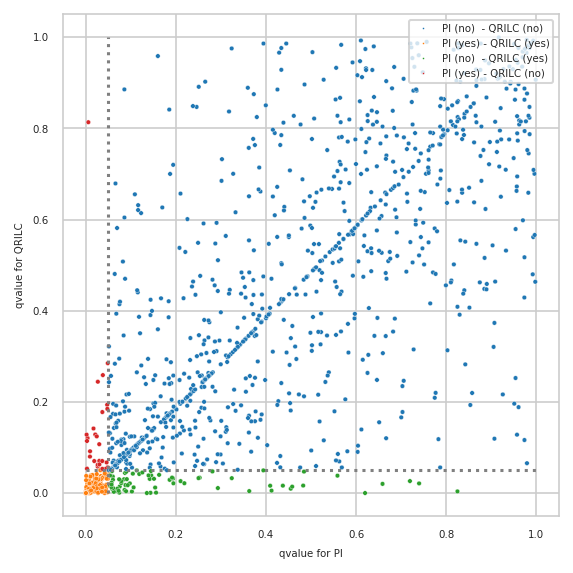

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


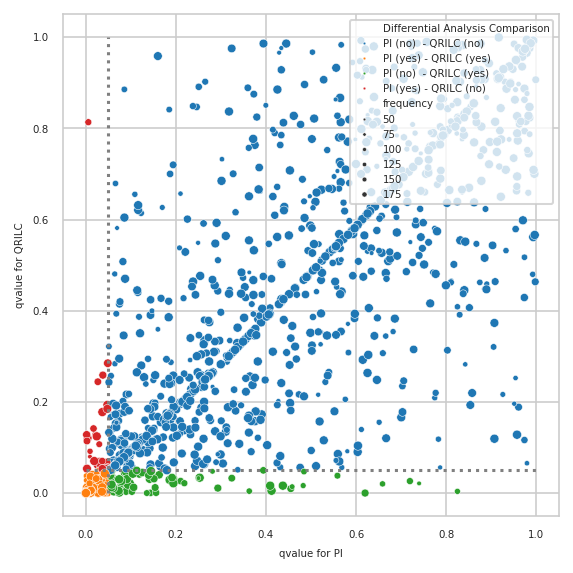

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out